In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("coffee_survey.csv")

In [58]:
plt.style.use("Solarize_Light2")

In [4]:
df.shape

(4042, 113)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 113 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(92)
memory usage: 3.5+ MB


In [6]:
list(df.columns)

['Submission ID',
 'What is your age?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
 'How do you brew

In [7]:
df["What is your age?"].unique()

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '55-64 years old', nan, '<18 years old', '>65 years old',
       '45-54 years old'], dtype=object)

In [8]:
df["What is your age?"].value_counts()

What is your age?
25-34 years old    1986
35-44 years old     960
18-24 years old     461
45-54 years old     302
55-64 years old     187
>65 years old        95
<18 years old        20
Name: count, dtype: int64

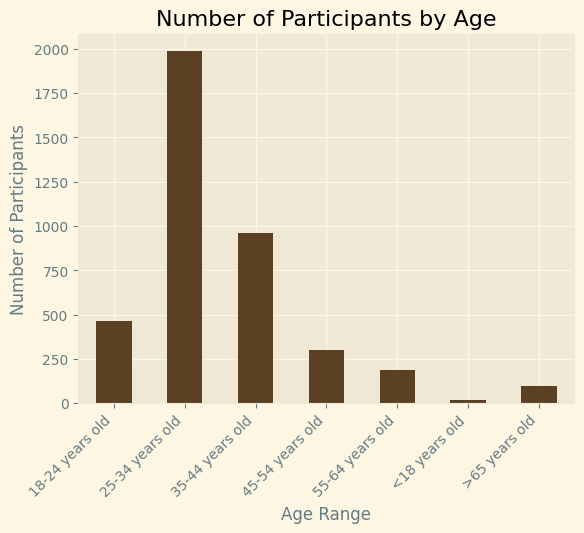

In [98]:
age_col_value_counts = (df["What is your age?"].value_counts())
age_graph = (age_col_value_counts.sort_index().plot(kind="bar", color="#5b4124"))

plt.xlabel("Age Range")
plt.ylabel("Number of Participants")
plt.title("Number of Participants by Age")

plt.xticks(rotation=45, ha='right')
plt.grid(True)

# plt.savefig("age.png")


In [52]:
df["What is your favorite coffee drink?"].unique()

array(['Regular drip coffee', 'Iced coffee', 'Latte', 'Pourover', nan,
       'Other', 'Cortado', 'Cappuccino', 'Espresso', 'Cold brew',
       'Americano', 'Mocha', 'Blended drink (e.g. Frappuccino)'],
      dtype=object)

In [51]:
df["What is your favorite coffee drink?"].value_counts()

What is your favorite coffee drink?
Pourover                            1084
Latte                                680
Regular drip coffee                  442
Cappuccino                           341
Espresso                             330
Cortado                              312
Americano                            249
Iced coffee                          156
Mocha                                118
Other                                114
Cold brew                            109
Blended drink (e.g. Frappuccino)      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferred Coffee Drink Type')

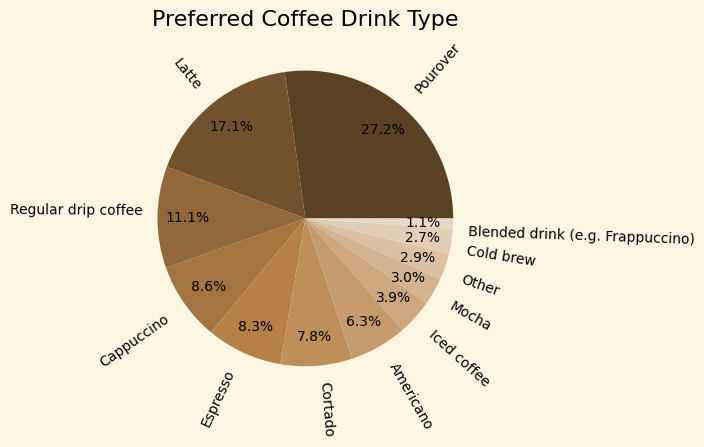

In [100]:
coffee_pref_counts = (df["What is your favorite coffee drink?"].value_counts())

colors = [
    "#5b4124",
    "#72512d",
    "#92673a",
    "#a47441",
    "#b68149",
    "#be8e5b",
    "#c59a6d",
    "#cca77f",
    "#d3b492",
    "#dbc0a4",
    "#e2cdb6",
    "#e9d9c8"
]

plt.pie(coffee_pref_counts,
        labels=coffee_pref_counts.index,
        rotatelabels=True,
        autopct="%1.1f%%",
        pctdistance=.8,
        colors=colors)

plt.title("Preferred Coffee Drink Type")

# plt.savefig("age.png")